In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import torch

In [13]:
from network import RealNVP
from loss import Loss

# Data

In [14]:
noisy_moons, label = datasets.make_moons(n_samples=1000, noise=0.05)

# Model

In [15]:
model = RealNVP()

## Loss, Optimizer

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [20]:
prior = torch.distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))

In [21]:
loss_log_det_jacobians = Loss(prior)

# Train

In [16]:
epochs = 1000

(epoch 0/1000) loss : 2.561


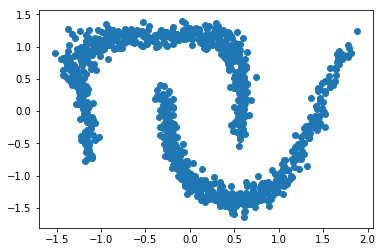

(epoch 200/1000) loss : 0.636


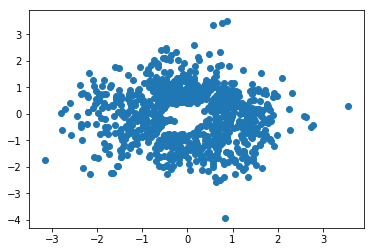

(epoch 400/1000) loss : 0.493


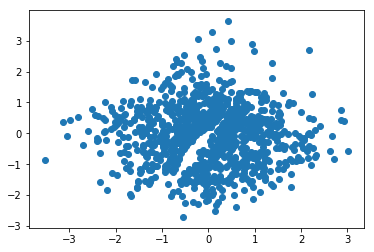

(epoch 600/1000) loss : 0.412


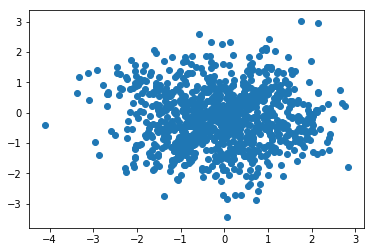

(epoch 800/1000) loss : 0.400


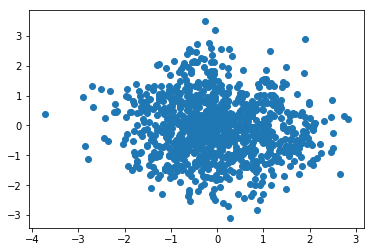

In [22]:
for epoch in range(epochs):
    model.train()
    x = datasets.make_moons(n_samples=1000, noise=0.05)[0].astype(np.float32)
    
    
    z, sum_log_det_jacobian = model(torch.from_numpy(x))
    loss = loss_log_det_jacobians(z, sum_log_det_jacobian)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print('(epoch %s/%s) loss : %.3f' % (epoch, epochs, loss.item()))
        # test
        model.eval()

        z, _ = model(torch.from_numpy(noisy_moons.astype(np.float32)))
        z = z.detach().numpy()
        plt.scatter(z[:,0], z[:,1])

        plt.show()

# Test

## Inference (x -> z)

In [27]:
x, label = datasets.make_moons(n_samples=1000, noise=.05)
x = x.astype(np.float32)

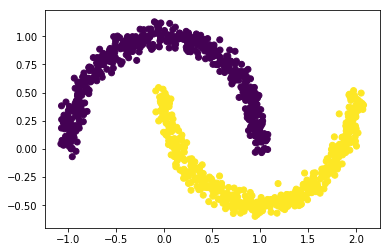

In [28]:
plt.scatter(x[:,0], x[:,1], c=label)

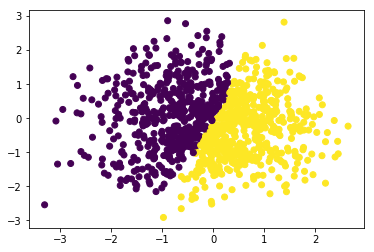

In [29]:
z, _ = model(torch.from_numpy(x))
z = z.detach().numpy()
plt.scatter(z[:,0], z[:,1], c=label)

## Generate (z->x)

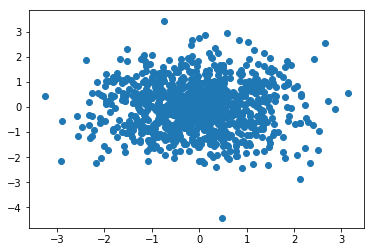

In [32]:
z = np.random.multivariate_normal(np.zeros(2), np.eye(2), 1000).astype(np.float32)
plt.scatter(z[:,0], z[:,1])

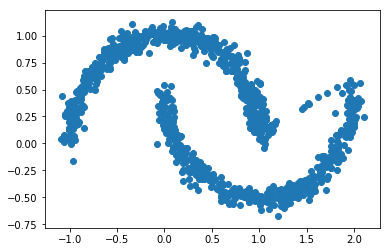

In [33]:
x = model(torch.from_numpy(z), reverse=True)
x = x.detach().numpy()
plt.scatter(x[:,0], x[:,1])